## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [7]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [8]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

In [9]:
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice.
combined_df["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df=combined_df.drop_duplicates(['Mouse ID', 'Timepoint'])

In [13]:
# Checking the number of mice in the clean DataFrame.
combined_df["Mouse ID"].describe()

count     1888
unique     249
top       i557
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen=combined_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean=grouped_regimen['Tumor Volume (mm3)'].mean()
tumor_volume_median=grouped_regimen['Tumor Volume (mm3)'].median()
tumor_volume_variance=grouped_regimen['Tumor Volume (mm3)'].var()
tumor_volume_std=grouped_regimen['Tumor Volume (mm3)'].std()
tumor_volume_sem=grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
grouped_regimen_df=pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean,
                     "Tumor Volume Median": tumor_volume_median,
                     "Tumor Volume Variance": tumor_volume_variance,
                     "Tumor Volume Standard Deviation": tumor_volume_std,
                     "Tumor Volume SEM": tumor_volume_sem})
grouped_regimen_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen_df2=combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
grouped_regimen_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

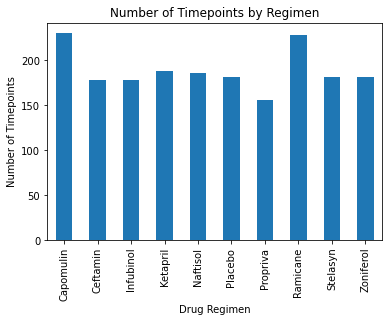

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug=combined_df.groupby('Drug Regimen')
timepoints=drug['Timepoint'].count()

count_chart=timepoints.plot(kind='bar')
count_chart.set_title("Number of Timepoints by Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Timepoints")

plt.show()

In [18]:
timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

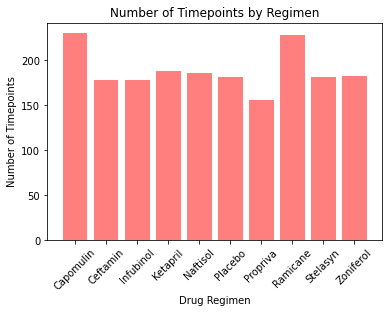

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]
tick_label=list(timepoints.keys())

plt.bar(x_axis, timepoints, tick_label=tick_label,color='r', alpha=0.5, align="center")

plt.xticks(rotation=45)
plt.title("Number of Timepoints by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()

Text(0, 0.5, '')

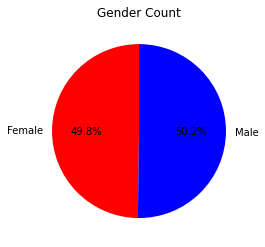

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=combined_df.groupby('Sex')['Mouse ID'].nunique()

gender_pie=gender_count.plot(kind='pie',startangle=90, colors=['red','blue'], autopct='%1.1f%%')
gender_pie.set_title("Gender Count")
gender_pie.set_ylabel("")

([<matplotlib.patches.Wedge at 0x23b7f338240>,
 [Text(-1.0999781124353174, 0.0069391759767658615, 'Female'),
  Text(1.0999781124353174, -0.006939175976765996, 'Male')],
 [Text(-0.5999880613283548, 0.003785005078235924, '49.8%'),
  Text(0.5999880613283548, -0.0037850050782359972, '50.2%')])

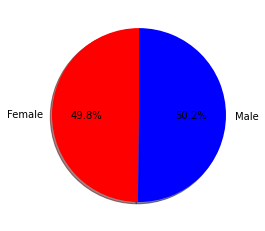

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data=gender_count.keys()
count_data=gender_count
colors = ["red", "blue"]
plt.pie(count_data, labels=gender_data, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df=combined_df.groupby("Mouse ID")["Timepoint"].max()
max_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [78]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(combined_df, max_df, on='Mouse ID')

# Cleaning the dataframe columns and filtering to the four treatments
max_timepoint_df = max_timepoint_df[max_timepoint_df["Timepoint_x"]==max_timepoint_df["Timepoint_y"]]
max_timepoint_df = max_timepoint_df[(max_timepoint_df["Drug Regimen"]=="Capomulin" )|
                                    (max_timepoint_df["Drug Regimen"]=="Ramicane")|
                                    (max_timepoint_df["Drug Regimen"]=="Infubinol")|
                                    (max_timepoint_df["Drug Regimen"]=="Ceftamin")]
max_timepoint_df["Timepoint"]=max_timepoint_df["Timepoint_x"]
max_timepoint_df = max_timepoint_df[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", 
                                  "Tumor Volume (mm3)", "Metastatic Sites"]]

#cleaned dataframe of final tumor volume of each mouse across four of the most promising treatment regimens
max_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [86]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=max_timepoint_df["Drug Regimen"].unique()
treatments=treatments.tolist()
treatments

list

In [63]:
max_timepoint_df["Tumor Volume (mm3)"].describe()

count    100.000000
mean      47.197795
std       12.953884
min       22.050126
25%       37.187744
50%       45.000000
75%       59.930262
max       72.226731
Name: Tumor Volume (mm3), dtype: float64

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
The the mean of tumor volume is: 47.197795189499985 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


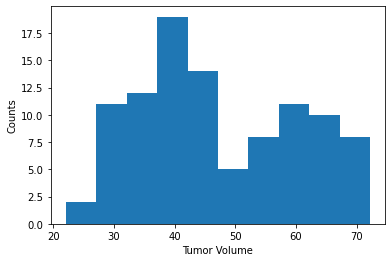

In [88]:
# Create empty list to fill with tumor vol data (for plotting)

volume = max_timepoint_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=max_timepoint_df['Tumor Volume (mm3)'].mean()

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print(f"The the mean of tumor volume is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(max_timepoint_df['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume')
plt.ylabel('Counts')
plt.show()

In [87]:
lower_bound

3.0739668737499812

In [89]:
upper_bound

94.04403868375002

In [97]:
volume=max_timepoint_df["Tumor Volume (mm3)"].tolist()

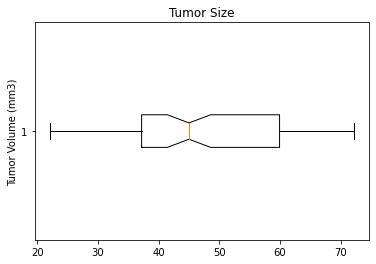

In [111]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(volume, notch=True, vert=False, flierprops=green_diamond)
plt.show()
#no outliers show

In [140]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    
capomulin_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Capomulin"]
capomulin_volume=capomulin_df['Tumor Volume (mm3)']
ramicane_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Ramicane"]
ramicane_volume=ramicane_df['Tumor Volume (mm3)']
infubinol_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Infubinol"]
infubinol_volume=infubinol_df['Tumor Volume (mm3)']
ceftamin_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Ceftamin"]
ceftamin_volume=ceftamin_df['Tumor Volume (mm3)']

In [141]:
# Determine outliers using upper and lower bounds
quartiles1 = capomulin_volume.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
capomulin_outliers=capomulin_df[(capomulin_df["Tumor Volume (mm3)"]< lower_bound1) |
                                (capomulin_df["Tumor Volume (mm3)"]> upper_bound1)]
capomulin_outliers

20.70456164999999 - 51.83201549


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [142]:
quartiles2 = ramicane_volume.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"{lower_bound2} - {upper_bound2}")
ramicane_outliers=ramicane_df[(ramicane_df["Tumor Volume (mm3)"]< lower_bound2) |
                                (ramicane_df["Tumor Volume (mm3)"]> upper_bound2)]
ramicane_outliers

17.912664470000003 - 54.30681135


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [143]:
quartiles3 = infubinol_volume.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"{lower_bound3} - {upper_bound3}")
infubinol_outliers=infubinol_df[(infubinol_df["Tumor Volume (mm3)"]< lower_bound3) |
                                (infubinol_df["Tumor Volume (mm3)"]> upper_bound3)]
infubinol_outliers

36.83290494999999 - 82.74144559000001


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [144]:
quartiles4 = ceftamin_volume.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"{lower_bound4} - {upper_bound4}")
ceftamin_outliers=ceftamin_df[(ceftamin_df["Tumor Volume (mm3)"]< lower_bound4) |
                                (ceftamin_df["Tumor Volume (mm3)"]> upper_bound4)]
ceftamin_outliers

25.355449580000002 - 87.66645829999999


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


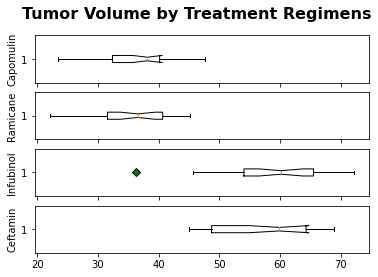

In [117]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,sharex=True)
fig1.suptitle("Tumor Volume by Treatment Regimens",fontsize=16,fontweight="bold")


ax1.boxplot(capomulin_volume, notch=True, vert=False, flierprops=green_diamond)
ax1.set_ylabel("Capomulin")
ax2.boxplot(ramicane_volume, notch=True, vert=False, flierprops=green_diamond)
ax2.set_ylabel("Ramicane")
ax3.boxplot(infubinol_volume, notch=True, vert=False, flierprops=green_diamond)
ax3.set_ylabel("Infubinol")
ax4.boxplot(ceftamin_volume, notch=True, vert=False, flierprops=green_diamond)
ax4.set_ylabel("Ceftamin")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
